## Taller 3 Mecánica Cuántica

$\textbf{Librerias}$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## $\textit{c}$ ) Discretización

In [2]:
N = 1000
x = np.linspace(-5,5,N)

## $\textit{d}$ ) Definición de Potencial Armónico

In [3]:
def potencial(x):
    V = 0.5*x**2
    return V

## $\textit{e}$ ) Implementación: Algoritmo de Numerov

In [4]:
def AlgoritmodeNumerov(x,E,p):
    V = p(x)
    psi = np.zeros(len(V))
    for n in range(len(V)):
        # Caso base
        if n == 0:
            psi[n]=0
        elif n == 1:
            psi[n] = 1*10**(-5)
        else:
            # Llamada recursiva
            h = x[n]-x[n-1]
            numerador = 2*(1+ 5*(h**2)/6*(V[n-1]-E))*psi[n-1]-(1-((h**2)/6*(V[n-2]-E)))*psi[n-2]
            denominador = 1-(h**2)/6*(V[n]-E)
            psi[n]=numerador/denominador
    psinorm = psi/np.sqrt(np.sum(psi**2))
    return psinorm

## $\textit{f}$ ) Función de Valores Propios

In [5]:
def ValoresPropios(x,E,p):
    dE = 0.001
    psiE = AlgoritmodeNumerov(x,E,p)[-1]
    psidE = AlgoritmodeNumerov(x,E+dE,p)[-1]
    if psiE*psidE < 0:
        return E
    else:
        return 0
    
E= []
e = 0
dE = 0.001

while len(E)<=5:
    if ValoresPropios(x,e,potencial) != 0:
        E.append(round(e,1))
    e += dE

print(E)

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]


## $\textit{g}$ ) Grafica de $\psi$ para este caso

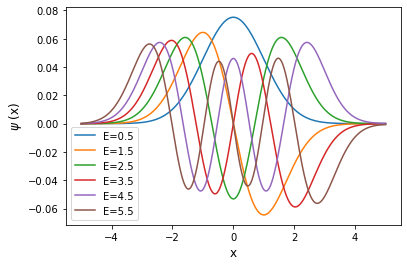

In [6]:
psi1 = AlgoritmodeNumerov(x,E[0],potencial)
psi2 = AlgoritmodeNumerov(x,E[1],potencial)
psi3 = AlgoritmodeNumerov(x,E[2],potencial)
psi4 = AlgoritmodeNumerov(x,E[3],potencial)
psi5 = AlgoritmodeNumerov(x,E[4],potencial)
psi6 = AlgoritmodeNumerov(x,E[5],potencial)
plt.plot(x,psi1)
plt.plot(x,psi2)    
plt.plot(x,psi3)
plt.plot(x,psi4)
plt.plot(x,psi5)
plt.plot(x,psi6)
plt.legend([f"E={E[0]}",f"E={E[1]}",f"E={E[2]}",f"E={E[3]}",f"E={E[4]}",f"E={E[5]}"])
plt.xlabel("x",fontsize= 12)
plt.ylabel(r"$\psi$ (x)",fontsize=12)
plt.show()

## $\textit{i}$ ) Potencial Gaussiano

In [7]:
limxi = 5
xi = np.linspace(-limxi,limxi,N)

def potencial1(x):
    V = -10*np.e**(-(x**2)/20)
    return V

Ei = [] 
ei = -10

while len(Ei)<=4:
    if ValoresPropios(xi,ei,potencial1) != 0:
        ei2d = int(ei * 100) / 100.0
        Ei.append(ei2d)
    ei += dE

Ei

[-9.51, -8.54, -7.62, -6.74, -5.89]

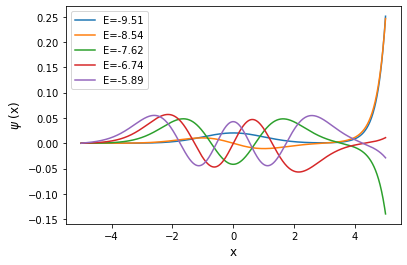

In [8]:
psi_i1 = AlgoritmodeNumerov(xi,Ei[0],potencial1)
psi_i2 = AlgoritmodeNumerov(xi,Ei[1],potencial1)
psi_i3 = AlgoritmodeNumerov(xi,Ei[2],potencial1)
psi_i4 = AlgoritmodeNumerov(xi,Ei[3],potencial1)
psi_i5 = AlgoritmodeNumerov(xi,Ei[4],potencial1)

plt.plot(xi,psi_i1)
plt.plot(xi,psi_i2)    
plt.plot(xi,psi_i3)
plt.plot(xi,psi_i4)
plt.plot(xi,psi_i5)

plt.legend([f"E={Ei[0]}",f"E={Ei[1]}",f"E={Ei[2]}",f"E={Ei[3]}",f"E={Ei[4]}"])
plt.xlabel("x",fontsize= 12)
plt.ylabel(r"$\psi$ (x)",fontsize=12)
plt.show()

## $\textit{j}$ ) Potencial Racional 

In [9]:
limxj = 5
xj = np.linspace(-limxj,limxj,N)

def potencial2(x):
    num = -4
    den = (1+x**2)**(2)
    V = num/den
    return V

Ej = [] 
ej = -3
a = 0
while len(Ej)<=1:
    if ValoresPropios(xj,ej,potencial2) != 0:
        ej3d = int(ej * 1000) / 1000.0
        Ej.append(ej3d)
        a += 1
        # print(a)
    ej += dE

Ej # La misma implementación funciona para el potencial Gaussiano, por lo que sospechamos que los valores del racional están mal

[-2.472, -0.426]

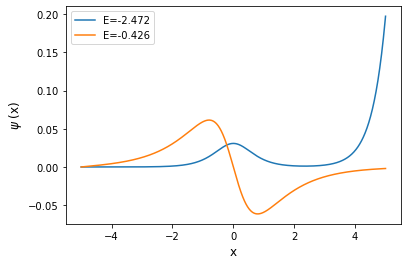

In [10]:
psi_j1 = AlgoritmodeNumerov(xj,Ej[0],potencial2)
psi_j2 = AlgoritmodeNumerov(xj,Ej[1],potencial2)

plt.plot(xj,psi_j1)
plt.plot(xj,psi_j2)    


plt.legend([f"E={Ej[0]}",f"E={Ej[1]}"])
plt.xlabel("x",fontsize= 12)
plt.ylabel(r"$\psi$ (x)",fontsize=12)
plt.show()